In [ ]:
%load_ext memory_profiler
# %matplotlib notebook

import matplotlib.pyplot as plt
import matplotlib
import os
from fits_reader import shelf
from fits_reader import fits_reader
import importlib
import glob
importlib.reload(fits_reader)
importlib.reload(shelf)
import gc

arms = ["armS","armM","armL"]
home_directory = os.environ['HOME']
season_name = "/WSMR2021May/reduction/2021-06-23"
experiment_name = "/abs_calib/vis/"
experiment_directory = home_directory + season_name + experiment_name
eps_shelf = shelf.make_reduction_shelf(experiment_directory)

# /Volumes/ciber2/Data/WSMR2021May/reduction/2021-06-23/abs_calib/vis/OD3

In [4]:
eps_shelf.get_all_books()

['OD2_+_cold_shutter_close',
 'Put_1m_LS_at_250mm_from_window_+_OD2',
 'Cal_lamp_Off_+_CIBER_shutter_Open',
 'OD1',
 'Cal_lamp_ON_+_CIBER_shutter_Close',
 'Cal_lamp_ON_+_CIBER_shutter_Open',
 'OD3',
 'OD0',
 'OD2__+_cold_shutter_open',
 'OD2',
 'Put_1m_LS_at_0mm_from_window_+_OD2',
 'Cal_lamp_Off_+_CIBER_shutter_Close',
 'Put_1m_LS_at_500mm_from_window_+_OD2']

/home/ciber2/python/main/calibration/fits_reader/shelf.py:82: RuntimeWarning: Mean of empty slice
  del imgs


(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

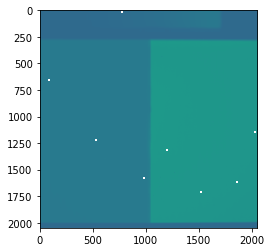

In [5]:
eps_shelf.show_eps_image("OD3","armS")

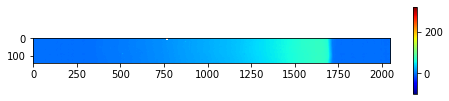

In [6]:
eps_shelf.showLVFimage("OD3","armS")

Text(0, 0.5, 'eps')

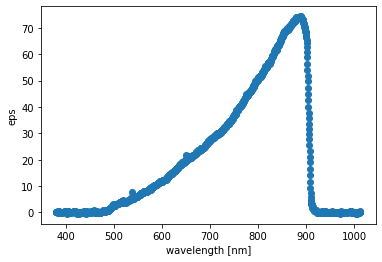

In [7]:
x_lvf, y_lvf = eps_shelf.getLVFxy("OD3","armS")
fig,ax = plt.subplots()
ax.scatter(x_lvf,y_lvf)
ax.set_xlabel("wavelength [nm]")
ax.set_ylabel("eps")

In [ ]:
_, eps_od1 = eps_shelf.getLVFxy("OD1","armS")
_, eps_od2 = eps_shelf.getLVFxy("OD2","armS")
_, eps_od3 = eps_shelf.getLVFxy("OD3","armS")
fig,ax = plt.subplots()
ax.scatter(x_lvf,y_lvf)
ax.set_xlabel("wavelength [nm]")
ax.set_ylabel("eps")